# IE 360 - HW1
## Raşit Cem Solatay - 2018402072
### 15/04/2022

## 1. Introduction
In this report, the relationship between the percentage changes in US Dollar exchange rates and production price indices, and the numbers of liquidated firms and unemployment rates is investigated by visualizing these time series gathered from EVDS along with the search volume records for "kariyer net" and "iş ilanı" search terms from Google Trends. For the US Dollar exchange rates and PPI values, the monthly percentage differences are used instead of raw values since it is known that fluctuations, jumps and drops are more important rather than nominal values for such metrics. Kariyer.net is a very popular online employment platform in Turkey, and it is hoped to be representing a positive correlation with unemployment rates while keeping the increasing popularity of this kind of online tools in recent years in mind. Also, as a more general search term "iş ilanı" is examined. All datasets are monthly and beginning from January 2015. Their common end point is February 2022. The list of the time series is as follows:
* US Dollar Buying and Selling Exchange Rates
* Domestic Producer Price Index
* Seasonally Adjusted Unemployment Rates (Removes the effect of seasonal workers)
* Total Number of Liquidated Firms
* Google Search Volume of "kariyer net"
* Google Search Volume of "iş ilanı"

# 2. Data Manipulation and Visualization
## a. Data Preparation
Loading necessary packages

In [ ]:
library(ggplot2)
library(data.table)
library(GGally)
library(lubridate)
library(gridExtra)
library(skimr)
library(xlsx)
library(zoo)

Reading each time series data and merging them into a data table object

In [2]:
exchange_rates <- read.xlsx("../datasets/HW1/exchange_rates.xlsx", sheetIndex = 1)
domestic_ppi <- read.xlsx("../datasets/HW1/domestic_ppi.xlsx", sheetIndex = 1)
unemployment <- read.xlsx("../datasets/HW1/unemployment_rates.xlsx", sheetIndex = 1)
liquidated_firms <- read.xlsx("../datasets/HW1/liquidated_firms.xlsx", sheetIndex = 1)
google_trends <- read.csv("../datasets/HW1/google_trends.csv", sep=",")

In [3]:
exchange_rates <- data.table(exchange_rates, key="Date")
domestic_ppi <- data.table(domestic_ppi, key="Tarih")
unemployment <- data.table(unemployment, key="Tarih")
liquidated_firms <- data.table(liquidated_firms, key="Tarih")
google_trends <- data.table(google_trends, key="Ay")
dt <- exchange_rates[domestic_ppi[unemployment[liquidated_firms[google_trends]]]]
dt <- na.omit(dt) # Discard last two rows which contains null values

Calculating the mean of selling and buying USD exchange rates to come up with a single value  
Calculating the percent month on month differences of USD exchange rates and domestic PPI values  
Arranging the column names and adding year and month columns for future use  

In [4]:
dt[, USD := mean(c(TP.DK.USD.A.YTL, TP.DK.USD.S.YTL)), list(Date)]
dt[, PerDiffUSD := 100 * (USD - shift(USD)) / shift(USD)]
dt[, TP.DK.USD.A.YTL := NULL]
dt[, TP.DK.USD.S.YTL := NULL]
dt[, PerDiffPPI := 100 * (TP.TUFE1YI.T1 - shift(TP.TUFE1YI.T1)) / shift(TP.TUFE1YI.T1)]
setnames(dt, "TP.TUFE1YI.T1", "PPI")
setnames(dt, "TP.TIG08", "Unemployment")
setnames(dt, "TP.KAP2.TOP.A", "LiquidatedFirms")
dt$Date <- as.Date(as.yearmon(dt$Date, format="%Y-%m"))
dt[, Month := month(Date)]
dt[, Year := year(Date)]
str(dt)
tail(dt)

Classes 'data.table' and 'data.frame':	86 obs. of  11 variables:
 $ Date           : Date, format: "2015-01-01" "2015-02-01" ...
 $ PPI            : num  237 239 242 245 248 ...
 $ Unemployment   : num  10.5 10.7 10.5 10.5 10.2 10.2 10.1 10.1 10.2 10.2 ...
 $ LiquidatedFirms: num  2734 1091 1000 992 712 ...
 $ kariyer.net    : int  41 44 43 36 34 39 40 42 41 42 ...
 $ is.ilani       : int  29 31 29 27 29 34 35 35 35 37 ...
 $ USD            : num  2.33 2.46 2.59 2.65 2.65 ...
 $ PerDiffUSD     : num  NA 5.4493 5.2387 2.4888 -0.0759 ...
 $ PerDiffPPI     : num  NA 1.2 1.05 1.43 1.11 ...
 $ Month          : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Year           : num  2015 2015 2015 2015 2015 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Date,PPI,Unemployment,LiquidatedFirms,kariyer.net,is.ilani,USD,PerDiffUSD,PerDiffPPI,Month,Year
2021-09-01,741.58,11.3,1687,100,33,8.519543,0.42677878,1.547352,9,2021
2021-10-01,780.45,11.1,1599,84,28,9.148173,7.37867401,5.241511,10,2021
2021-11-01,858.43,11.1,1661,71,27,10.532739,15.13489319,9.991671,11,2021
2021-12-01,1022.25,11.1,4057,67,23,13.540678,28.55800118,19.083676,12,2021
2022-01-01,1129.03,11.2,1088,79,27,13.531438,-0.06824005,10.445586,1,2022
2022-02-01,1210.60,10.7,806,88,28,13.633395,0.75348166,7.224786,2,2022


The last data table obtained includes all information needed in proper forms. Before proceeding with visualizing the data, quick numerical analysis of the data may be useful.
## b. Numerical Analysis of the Data

In [5]:
skim(dt)

-- Data Summary ------------------------
                           Values
Name                       dt    
Number of rows             86    
Number of columns          11    
Key                        NULL  
_______________________          
Column type frequency:           
  Date                     1     
  numeric                  10    
________________________         
Group variables            None  

-- Variable type: Date ---------------------------------------------------------
# A tibble: 1 x 7
  skim_variable n_missing complete_rate min        max        median    
* <chr>             <int>         <dbl> <date>     <date>     <date>    
1 Date                  0             1 2015-01-01 2022-02-01 2018-07-16
  n_unique
*    <int>
1       86

-- Variable type: numeric ------------------------------------------------------
# A tibble: 10 x 11
   skim_variable   n_missing complete_rate    mean     sd      p0      p25
 * <chr>               <int>         <dbl>   <dbl>  <dbl

There are only 2 missing values in the data table which are the first records of month on month difference percentage of USD and PPI, therefore it is ignored. USD and PPI values seem to have a wide range over the last 7 years. USD is ranging from 2.33TL to 13.6TL, and PPI is ranging from 237 to 1211. Also they have specific months that they had sharp increases which are respectively 28.6% and 19.1%. In the time series of the number of liquidated firms, there is a large difference between the 3rd quartile and the maximum value. It may be an implication of a skewed distribution along time.

In [6]:
dt <- na.omit(dt)

## c. Data Visualization
We can start the visual analysis from plotting the time series

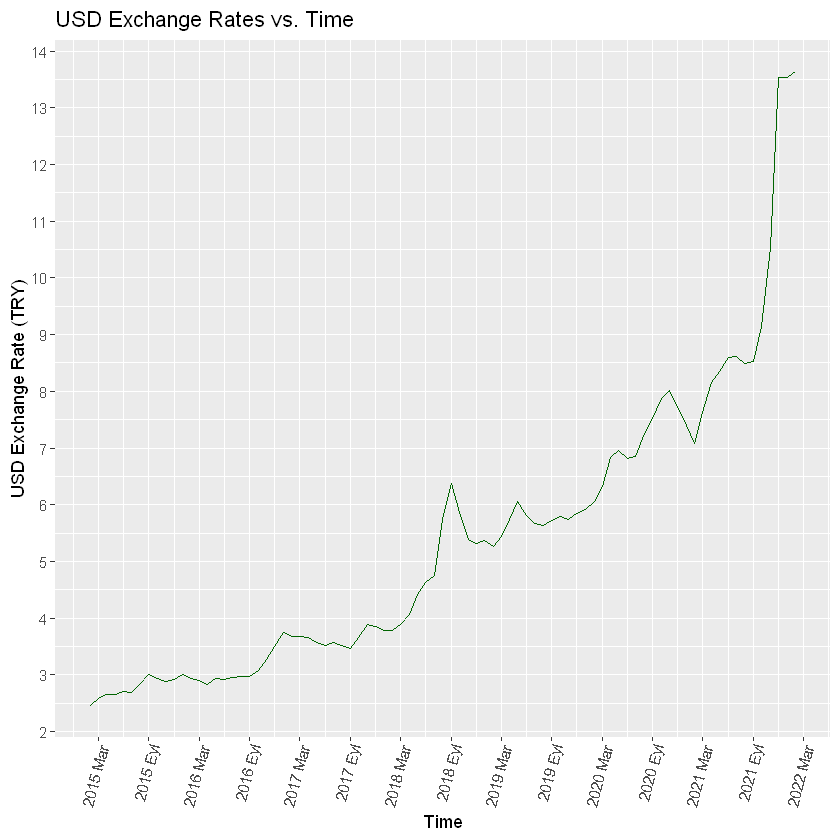

In [7]:
ggplot(dt, aes(x = Date, y = USD)) + geom_line(color="darkgreen") +
    labs(title = "USD Exchange Rates vs. Time", x = "Time", y = "USD Exchange Rate (TRY)") +
    scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "3 month") +
    theme(axis.text.x=element_text(angle=75,  hjust=1.4, vjust = 1.4)) +
    scale_y_continuous(breaks = seq(from = 0,to = 14,by = 1), minor_breaks = seq(from = 0,to = 14,by = .5))

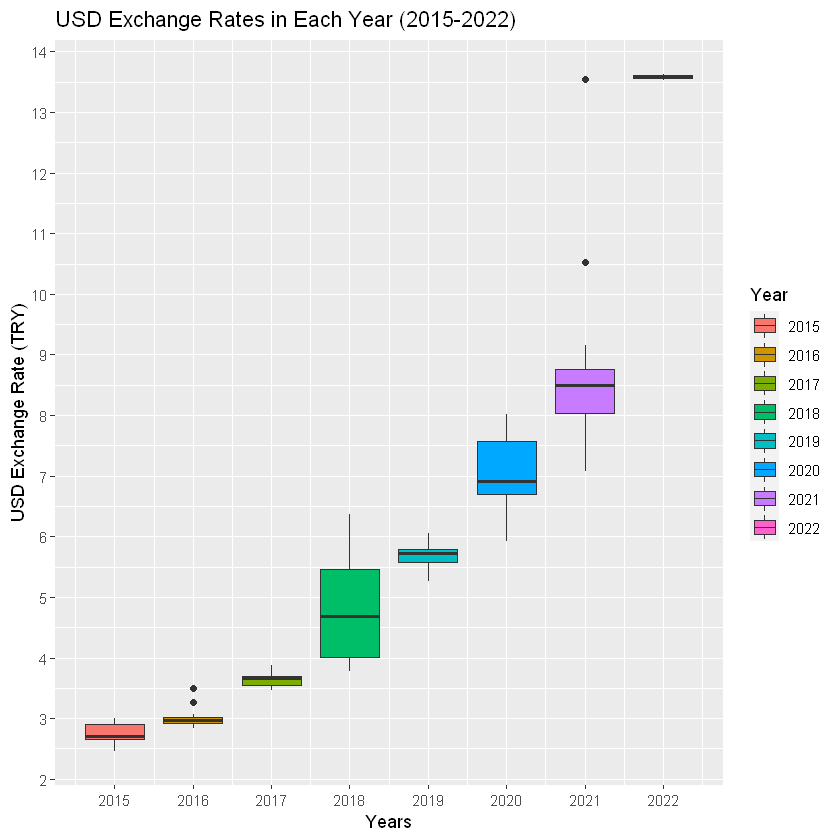

In [8]:
ggplot(dt, aes(x = Year, y = USD)) + geom_boxplot(aes(y = USD, fill = factor(Year))) +
    labs(title = "USD Exchange Rates in Each Year (2015-2022)", x = "Years", y = "USD Exchange Rate (TRY)", fill = "Year") +
    scale_y_continuous(breaks = seq(from = 0,to = 14,by = 1), minor_breaks = seq(from = 0,to = 14,by = .5)) +
    scale_x_continuous(breaks = seq(from = 2015, to = 2022, by = 1))

2021 has significant outlier values that makes it possible for USD to be at the high levels today, and USD exchange rates in 2018 seem to be distributed in a wider range in the absence of outliers.

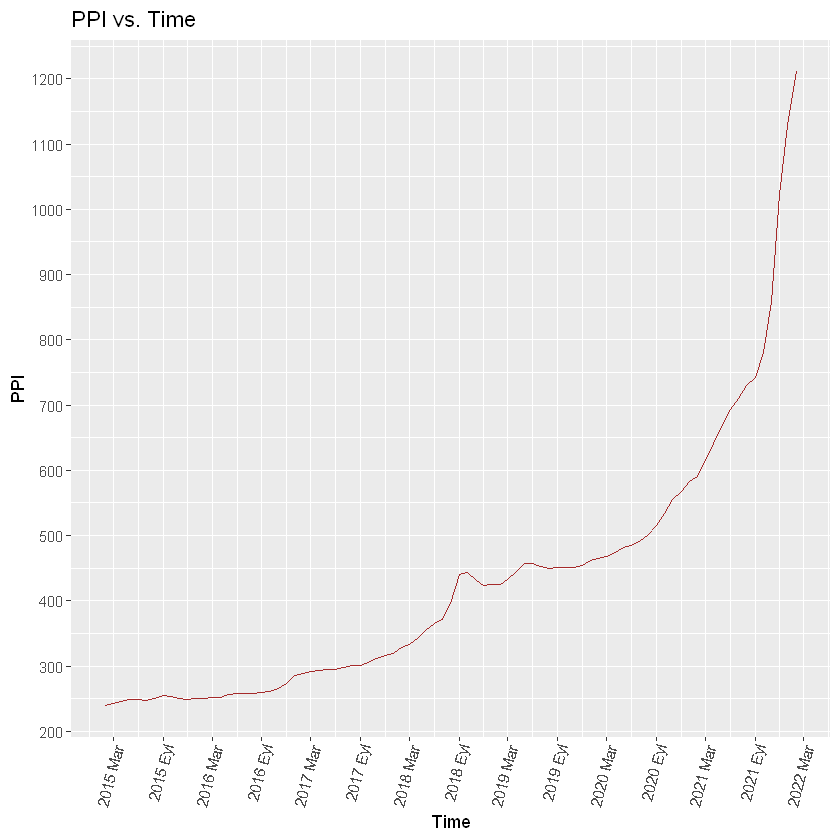

In [9]:
ggplot(dt, aes(x = Date, y = PPI)) + geom_line(color="brown") +
    labs(title = "PPI vs. Time", x = "Time", y = "PPI") +
    scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "3 month") +
    theme(axis.text.x=element_text(angle=75,  hjust=1.4, vjust = 1.4)) +
    scale_y_continuous(breaks = seq(from = 0,to = 1300,by = 100), minor_breaks = seq(from = 0,to = 1300,by = 50))

Both PPI and USD exchange rates values show exponential growth over the years. So, let's plot their month on month differences on the same graph to see their parallel growth more clear.

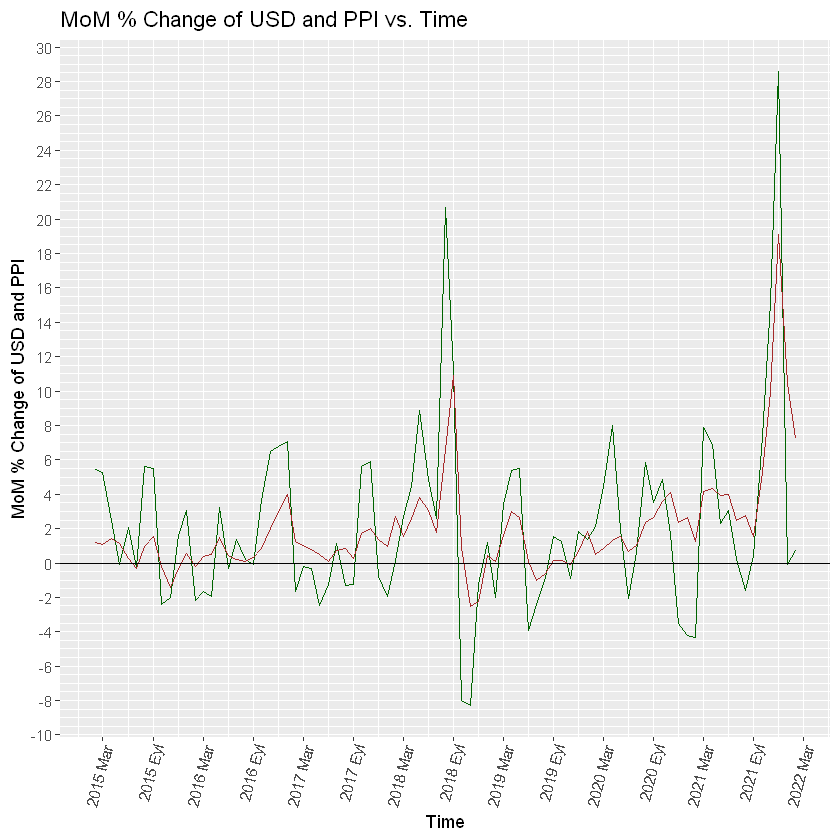

In [10]:
ggplot(dt, aes(x = Date)) + geom_line(aes(y = PerDiffUSD), color = "darkgreen") +
    geom_line(aes(y = PerDiffPPI), color = "brown") + geom_hline(yintercept = 0, color = "black") +
    labs(title = "MoM % Change of USD and PPI vs. Time", x = "Time", y = "MoM % Change of USD and PPI") +
    scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "3 month") +
    theme(axis.text.x=element_text(angle=75,  hjust=1.4, vjust = 1.4)) +
    scale_y_continuous(breaks = seq(from = -10,to = 30, by = 2), minor_breaks = seq(from = -10,to = 30, by = 0.5))

It is obvious that they show a similar trend but USD exchange rates have larger amplitude. Additionally, an important observation can be made here that PPI increases follows the increases in the USD exchange rate a few months behind. So, the effects of exchange rate changes become fully visible on PPI with a lag.

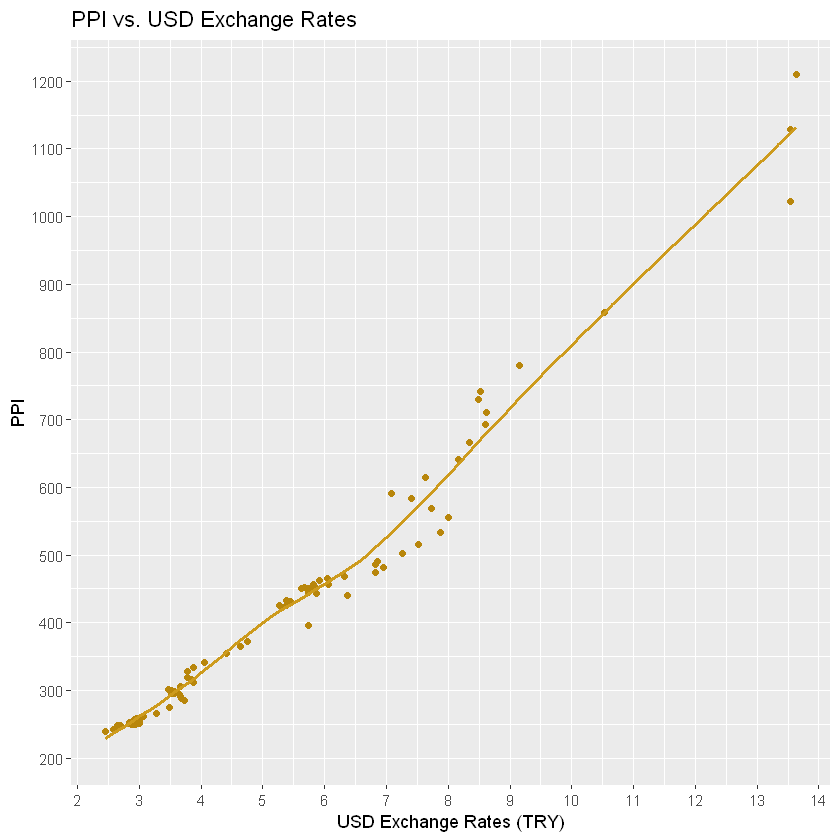

In [11]:
ggplot(dt, aes(x = USD, y = PPI)) + geom_point(color="darkgoldenrod") +
    labs(title = "PPI vs. USD Exchange Rates", x = "USD Exchange Rates (TRY)", y = "PPI") +
    scale_x_continuous(breaks = seq(from = 0,to = 14,by = 1), minor_breaks = seq(from = 0,to = 14,by = 0.5)) +
    scale_y_continuous(breaks = seq(from = 0,to = 1300,by = 100), minor_breaks = seq(from = 0,to = 1300,by = 50)) + 
    geom_smooth(fill = NA, method = "loess", formula = "y ~ x", color = "goldenrod3")

The scatter plot of USD vs. PPI and the smoothed line clearly shows that there is nearly a perfect correlation between these metrics.

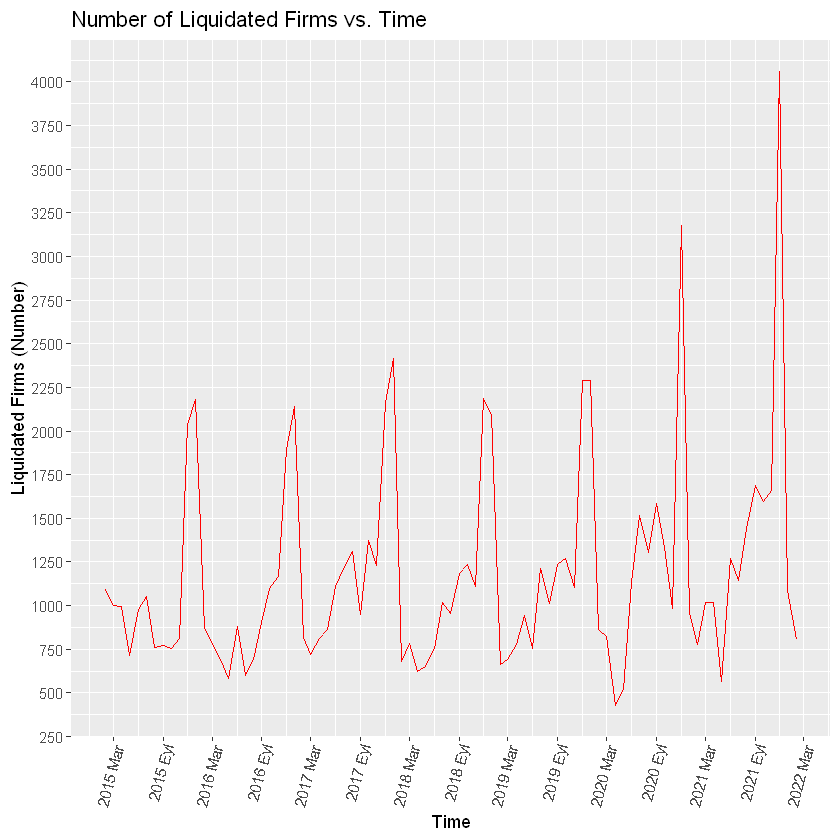

In [12]:
ggplot(dt, aes(x = Date, y = LiquidatedFirms)) + geom_line(color="red") +
    labs(title = "Number of Liquidated Firms vs. Time", x = "Time", y = "Liquidated Firms (Number)") +
    scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "3 month") +
    theme(axis.text.x=element_text(angle=75,  hjust=1.4, vjust = 1.4)) +
    scale_y_continuous(breaks = seq(from = 0,to = 5000, by = 250), minor_breaks = seq(from = 0,to = 5000,by = 125))

There is apparently a seasonal effect on the total number of liquidated firms and a positive trend that is hardly observable. This situation will be investigated.

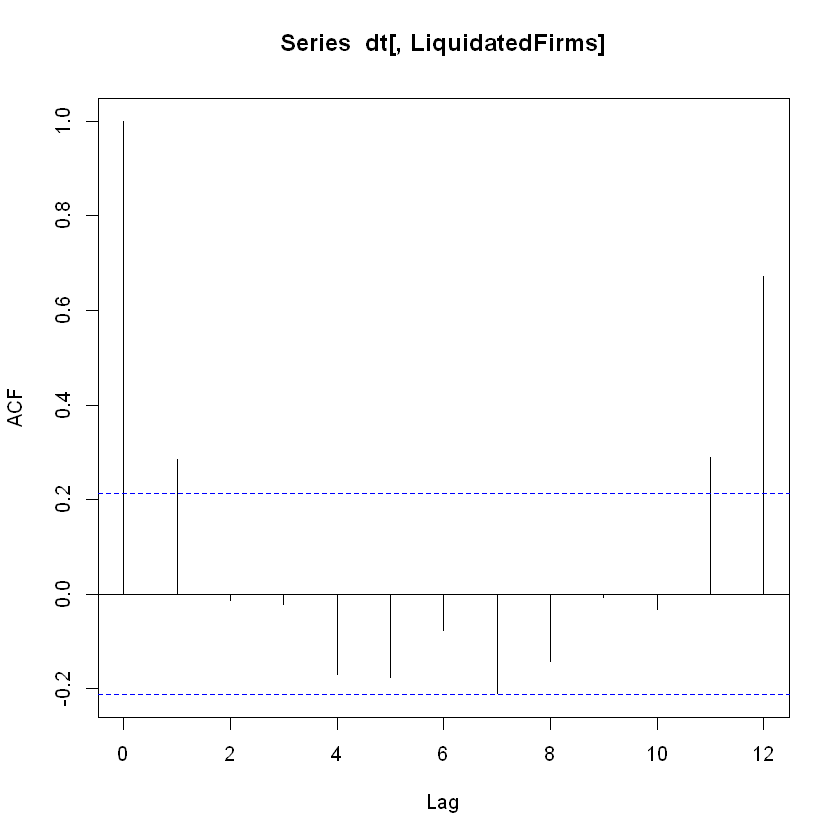

In [13]:
acf(dt[, LiquidatedFirms], 12)

The autocorrelation functions clearly shows that there is a significant seasonality in the number of liquidated firms on yearly basis (lags 11 and 12). Also autocorrelation function at lag 1 has a value that is beyond the upper limit, so this confirms the increasing trend observation.

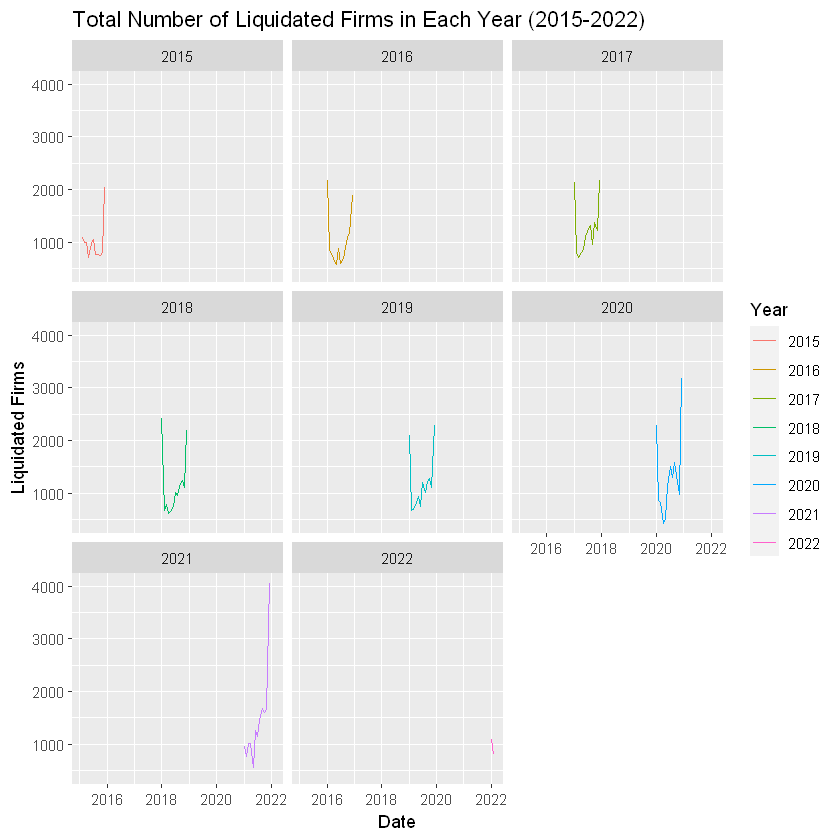

In [14]:
ggplot(dt, aes(x=Date, y=LiquidatedFirms)) + geom_line(aes(color=factor(Year))) +
    facet_wrap(Year~., ncol=3) +
    labs(title = "Total Number of Liquidated Firms in Each Year (2015-2022)", x = "Date", y = "Liquidated Firms", color="Year")

Each year has a shape like U or W. In January and December, an extraordinary numbers of firms are liquidated. This may be resulting from a government policy about taxes or corporate laws that leads people to take this decision in the end and beginning of the year.

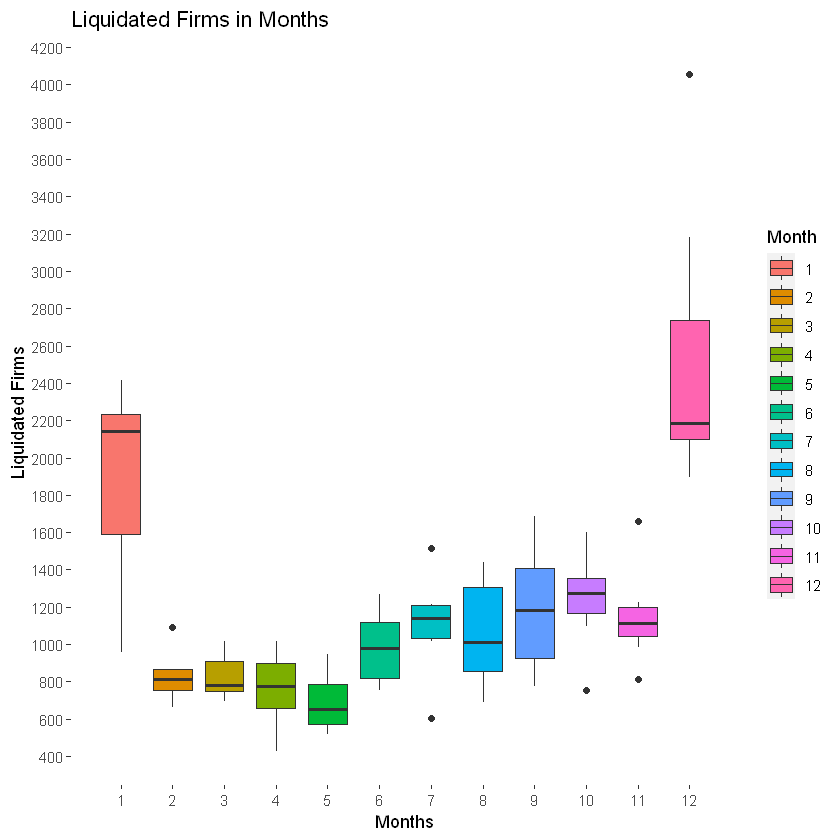

In [15]:
ggplot(dt, aes(x = Month, y = LiquidatedFirms)) + geom_boxplot(aes(y = LiquidatedFirms, fill = factor(Month))) +
    labs(title = "Liquidated Firms in Months", x = "Months", y = "Liquidated Firms", fill = "Month") +
    scale_y_continuous(breaks = seq(from = 0,to = 4400,by = 200), minor_breaks = seq(from = 0,to = 4400,by = .100)) +
    scale_x_continuous(breaks = seq(from = 1, to = 12, by = 1))

It is once again shown that January and December have different dynamics in terms of liquidated firms rather than other months. Also, they have very similar median values.

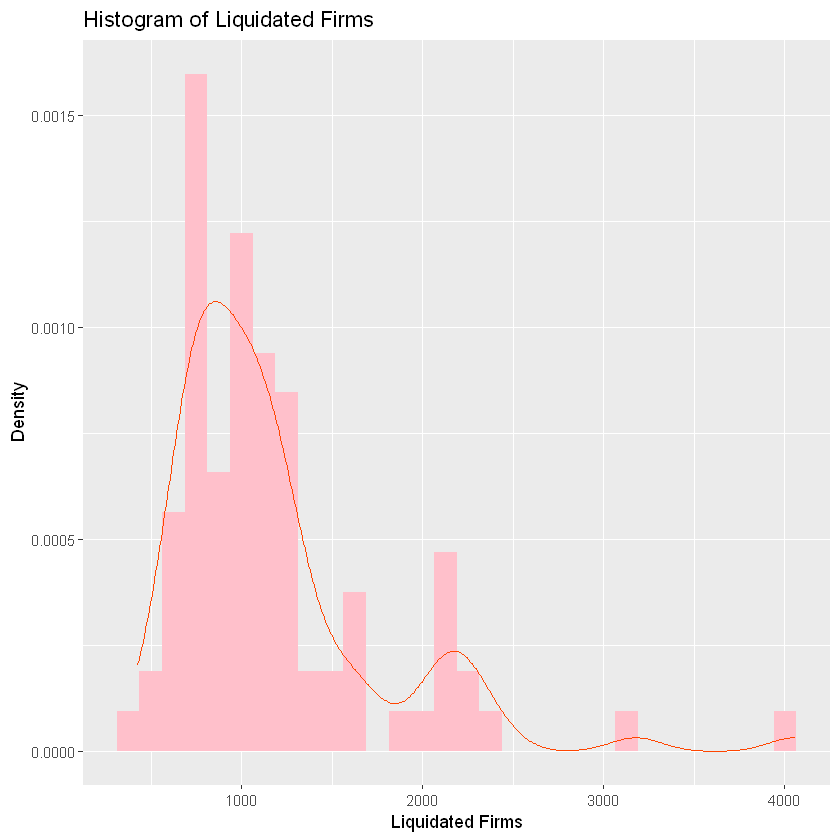

In [16]:
ggplot(dt, aes(x=LiquidatedFirms, y= ..density..)) + geom_histogram(bins = 30, fill = "pink") +
    geom_density(color = "orangered") +
    labs(title = "Histogram of Liquidated Firms", x = "Liquidated Firms", y = "Density")

The number of liquidated firms is distributed with a heavy tail and it is right skewed. There are two bell shaped parts of the density estimation together with some extreme observations. The left most bell shaped curve represents the months except January and December while the middle bell shaped curve represents those months. 

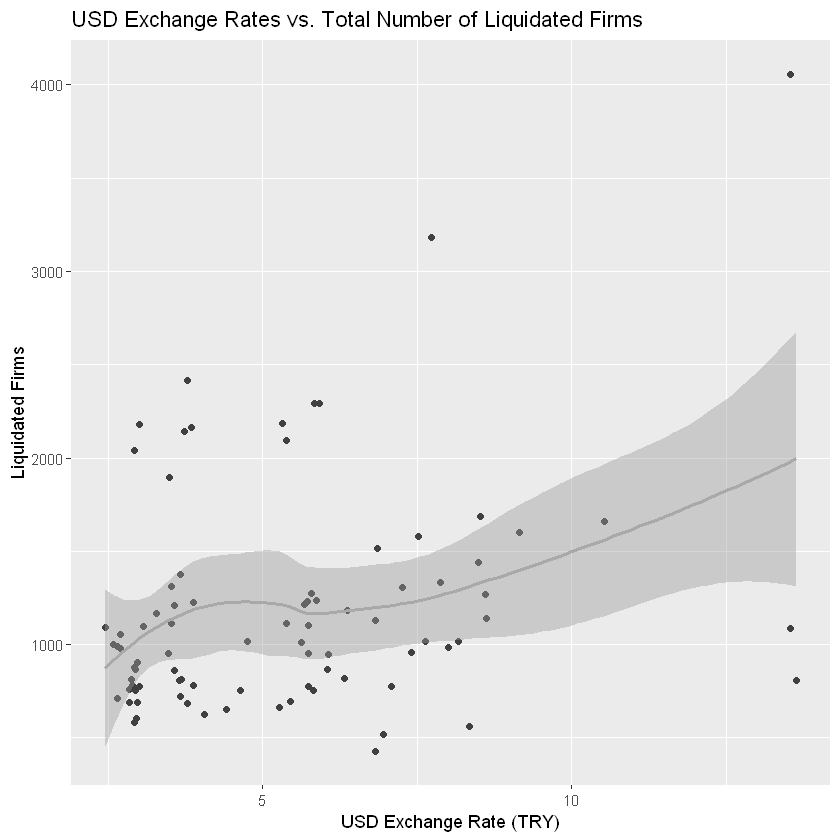

In [17]:
ggplot(dt, aes(x = USD, y = LiquidatedFirms)) + geom_point(color = "gray25") + 
    geom_smooth(color = "darkgray", method = "loess", formula = "y~x") +
    labs(title = "USD Exchange Rates vs. Total Number of Liquidated Firms", x = "USD Exchange Rate (TRY)", y = "Liquidated Firms")

From the scatter plot of USD exchange rates and liquidated firms, it is possible to say that there is a slight positive correlation between them. But the effect of outliers should not be neglected in this expression. With the growth of USD exchange rate, the extreme values that liquidated firms take in January and December seem to grow, too. Also in the other months there is again an increase together with each other.

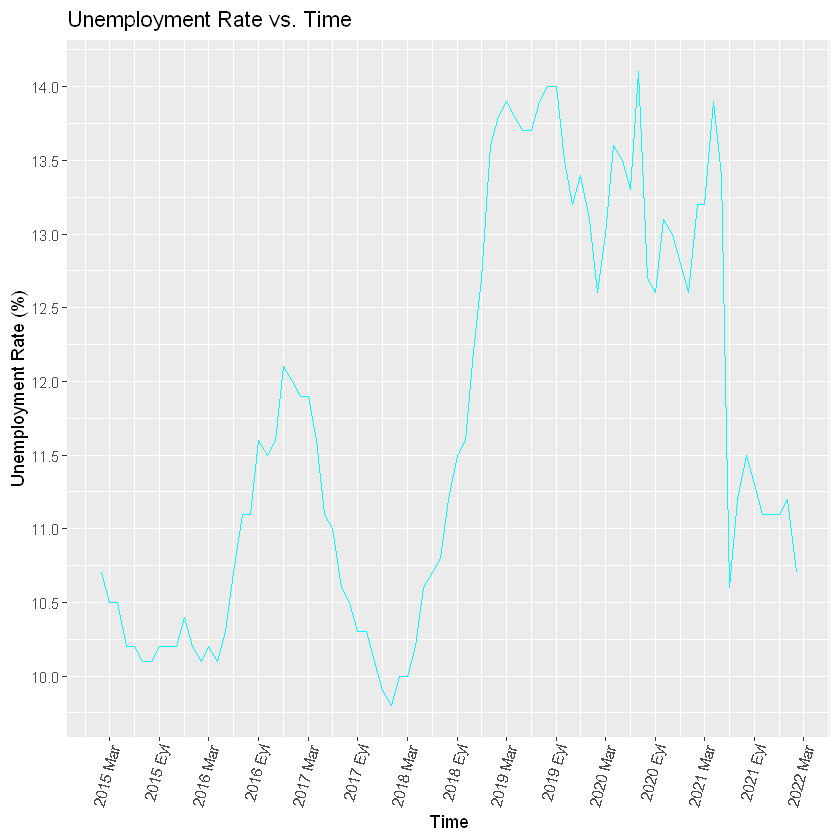

In [18]:
ggplot(dt, aes(x = Date, y = Unemployment)) + geom_line(color="cyan") +
    labs(title = "Unemployment Rate vs. Time", x = "Time", y = "Unemployment Rate (%)") +
    scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "3 month") +
    theme(axis.text.x=element_text(angle=75,  hjust=1.4, vjust = 1.4)) +
    scale_y_continuous(breaks = seq(from = 0,to = 15, by = 0.5), minor_breaks = seq(from = 0,to = 15,by = 0.25))

The unemployment rates are not similar to what we have seen previously. There is an increasing trend between January 2018 and June 2019, it stays there for a while and drops back to its previous levels between 2016-2017. There are many factors in unemployment rates apart from the situation of the economy such as government policies (eg. acceleratingly increasing number of university students), calculations and definitions of TURKSTAT. But, we can try to find correlations with economic indicators. Also, during the period that Covid 19 severly hit the economy, the unemployment rate reached its maximum level which is predictable.

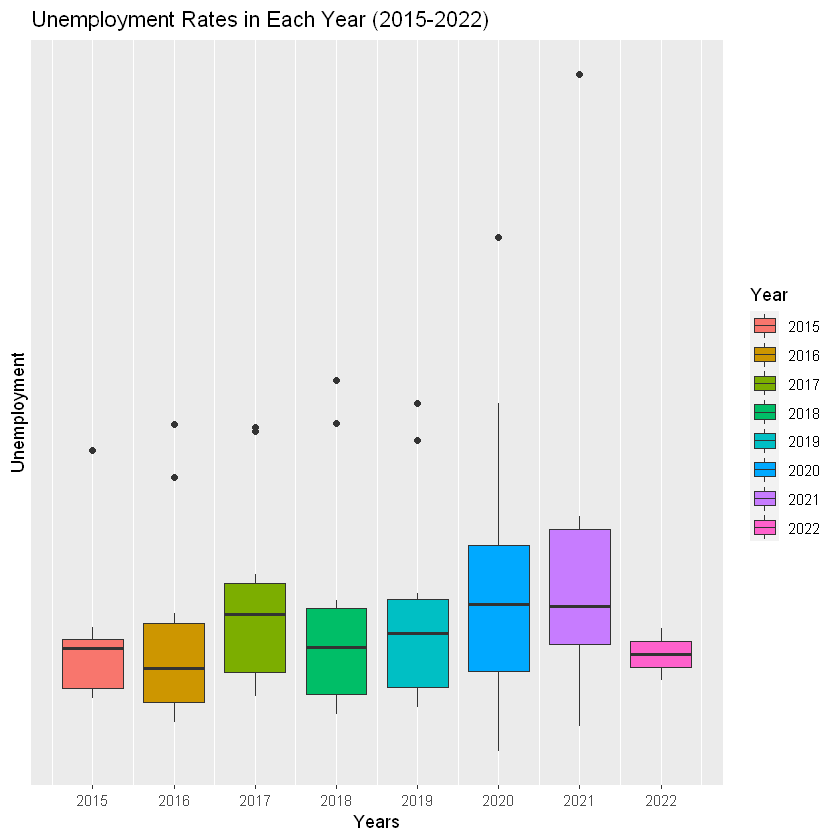

In [19]:
ggplot(dt, aes(x = Year, y = Unemployment)) + geom_boxplot(aes(y = LiquidatedFirms, fill = factor(Year))) +
    labs(title = "Unemployment Rates in Each Year (2015-2022)", x = "Years", y = "Unemployment", fill = "Year") +
    scale_y_continuous(breaks = seq(from = 0,to = 15,by = 1)) +
    scale_x_continuous(breaks = seq(from = 2015, to = 2022, by = 1))

Unemployment rates in 2020 and 2021 are appearing to be greater than other years, most probably since the Covid 19 pandemic and its devastating effect on economies. 

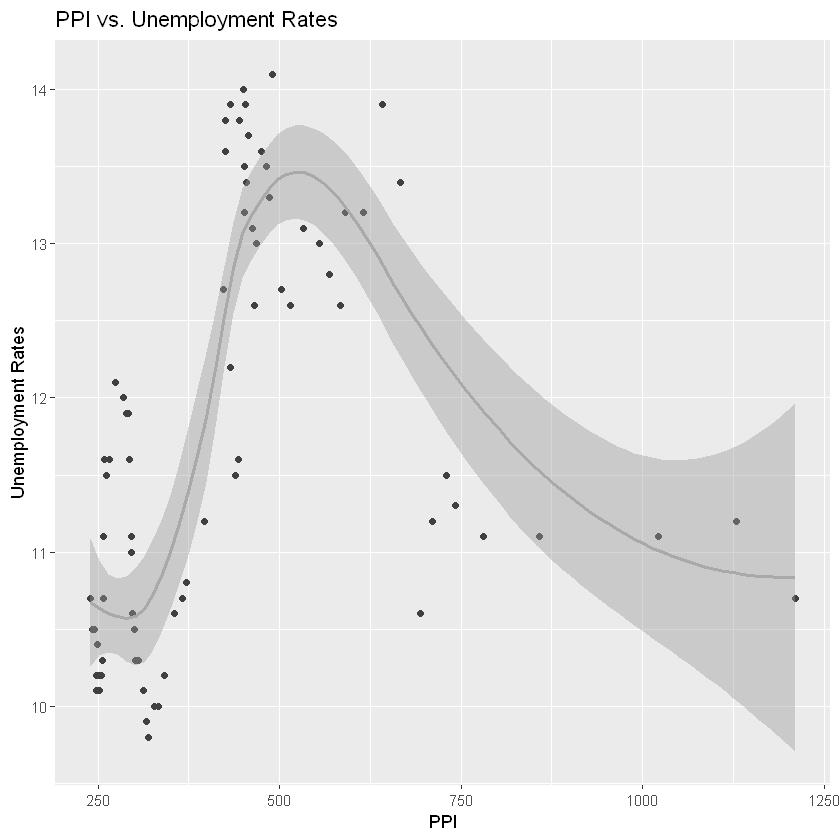

In [20]:
ggplot(dt, aes(x = PPI, y = Unemployment)) + geom_point(color = "gray25") + 
    geom_smooth(color = "darkgray", method = "loess", formula = "y~x") +
    labs(title = "PPI vs. Unemployment Rates", x = "PPI", y = "Unemployment Rates")

If we ignore the PPI values that are larger than 700 which are observed in the last 2 years, we may say that there is a strong correlation between PPI and unemployment rates. Unfortunately we can't ignore them but we can optimistically hypothesize that government takes some actions to decrease unemployment rates regardless of the downward going trend of the economy. Apart from that part, data tells us that the more the production becomes costly, the more people get unemployed. 

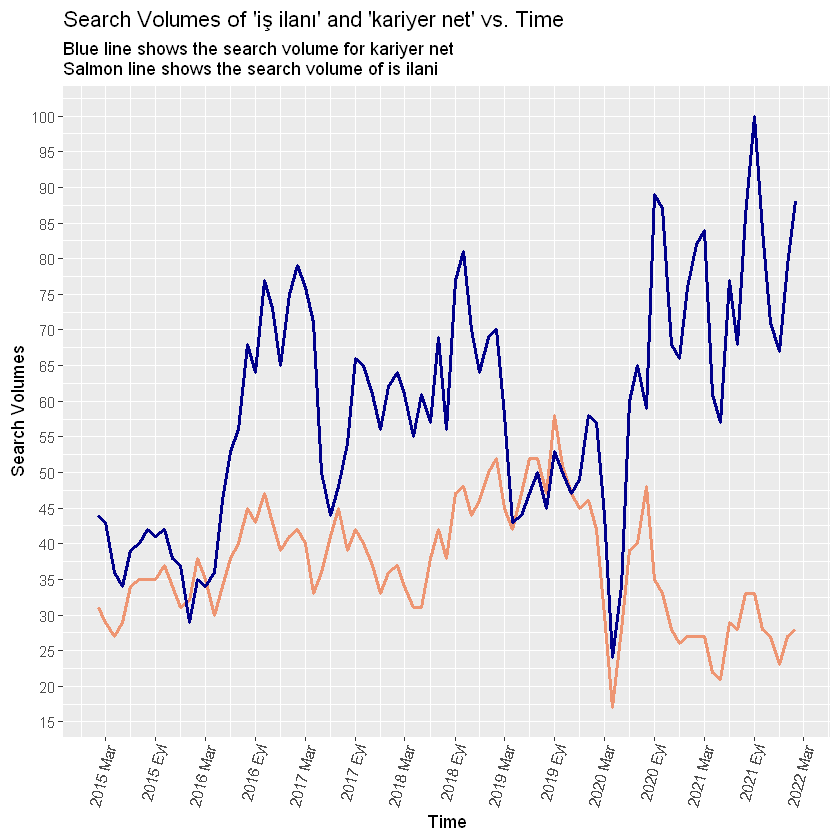

In [21]:
ggplot(dt, aes(x = Date)) + geom_line(aes(y = is.ilani), color = "lightsalmon2", size = 1) +
    geom_line(aes(y = kariyer.net), color = "darkblue", size = 1) +
    labs(title = "Search Volumes of 'iş ilanı' and 'kariyer net' vs. Time", x = "Time", y = "Search Volumes", subtitle = "Blue line shows the search volume for kariyer net\nSalmon line shows the search volume of is ilani") +
    scale_x_date(date_breaks = "6 month", date_labels = "%Y %b", date_minor_breaks = "3 month") +
    theme(axis.text.x=element_text(angle=75,  hjust=1.4, vjust = 1.4)) +
    scale_y_continuous(breaks = seq(from = 0,to = 100, by = 5)) 

The general patterns in both search terms look similar, but kariyer net shows an increasing trend with its increasing popularity, while iş ilanı shows more of a stagnant course since it is like a consolidated search term for all online employment platforms. In March, April 2020, both search terms sink to the bottom together since almost every business shut down for a while in our country. However right after that, especially kariyer net search rose to its highest values.

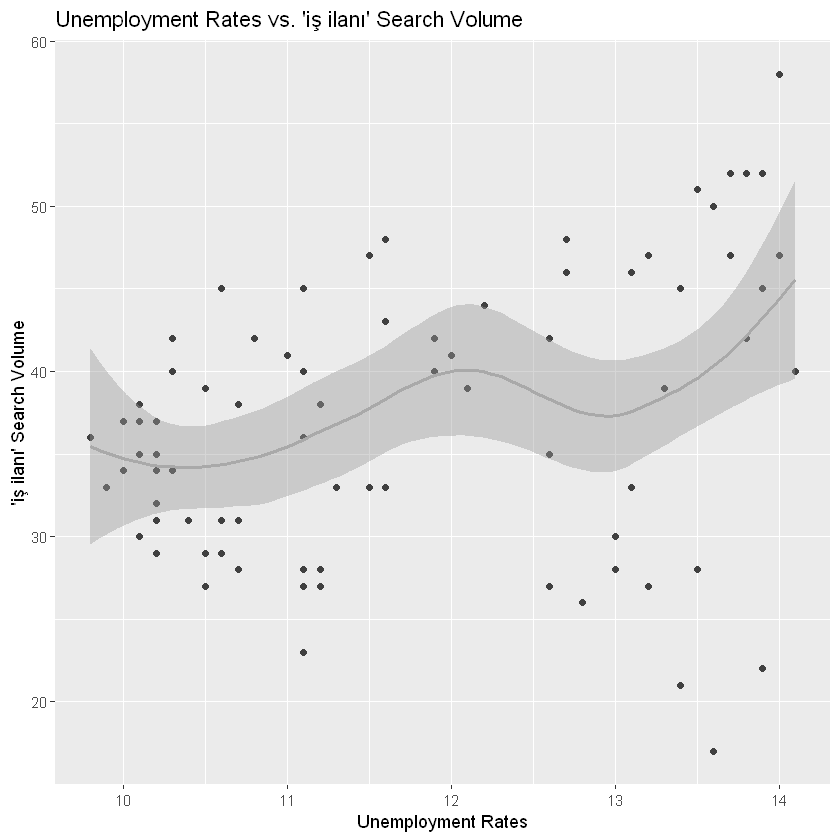

In [22]:
ggplot(dt, aes(x = Unemployment, y = is.ilani)) + geom_point(color = "gray25") + 
    geom_smooth(color = "darkgray", method = "loess", formula = "y~x") +
    labs(title = "Unemployment Rates vs. 'iş ilanı' Search Volume", x = "Unemployment Rates", y = "'iş ilanı' Search Volume")

It is seen that there is a positive correlation between unemployment rates and iş ilanı search volumes.

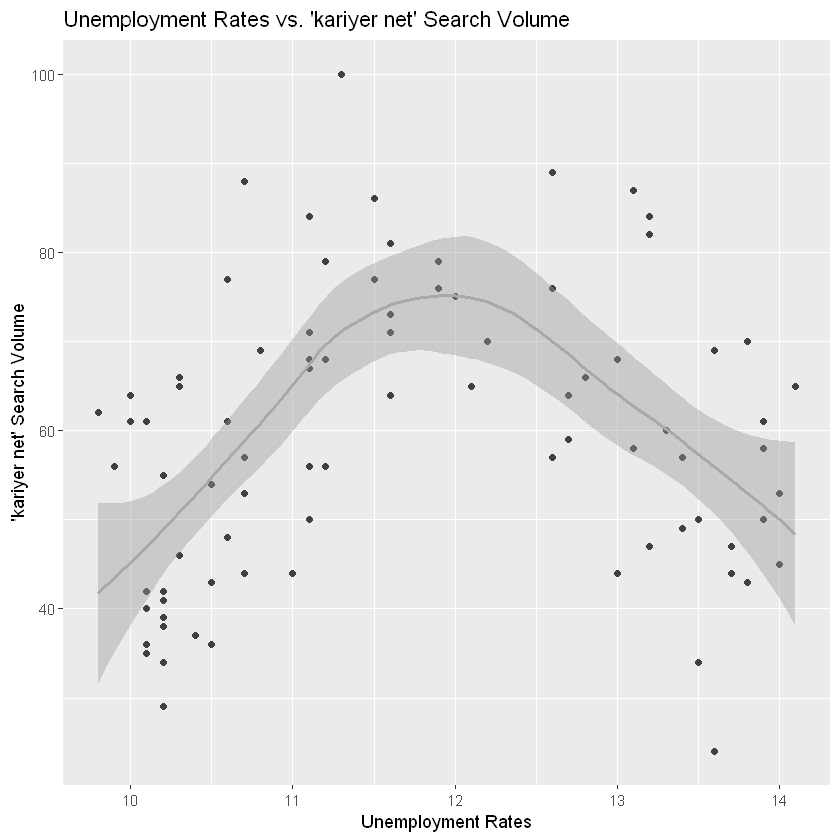

In [23]:
ggplot(dt, aes(x = Unemployment, y = kariyer.net)) + geom_point(color = "gray25") + 
    geom_smooth(color = "darkgray", method = "loess", formula = "y~x") +
    labs(title = "Unemployment Rates vs. 'kariyer net' Search Volume", x = "Unemployment Rates", y = "'kariyer net' Search Volume")

However kariyer net search volumes show a bizarre behavior against unemployment rates. The reason behind this is when the unemployment reaches at its highest levels between 2019-2020, kariyer net search volumes drops until the middle of 2020. This may be the result of the situation of the company at that time period or some other problem. However, again if we don't consider that 2 years period, they are highly correlated.
## d. Correlation Coefficients

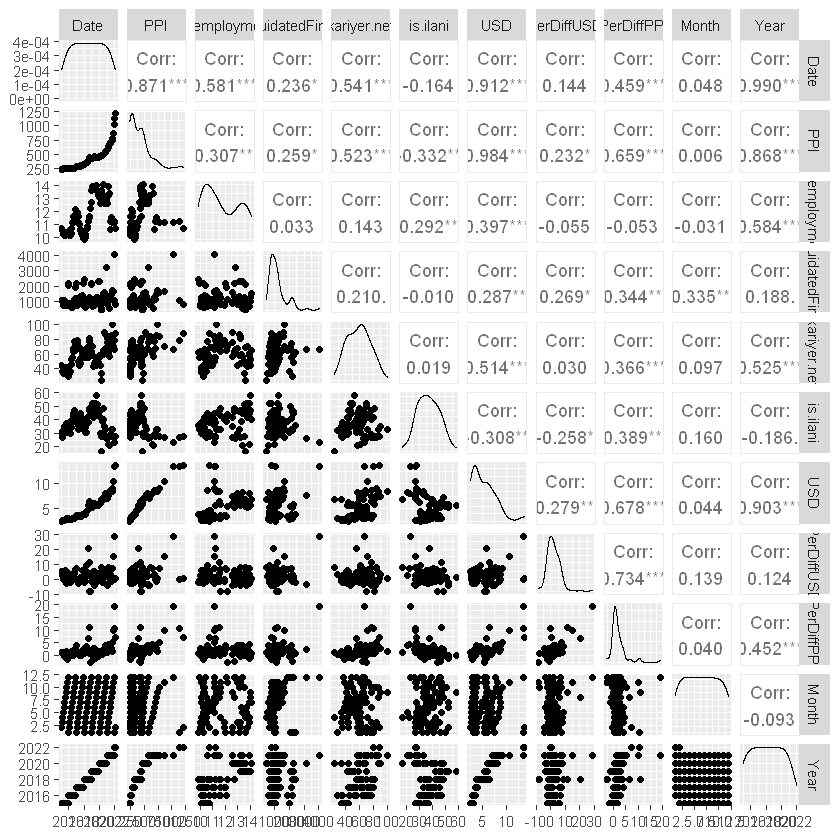

In [24]:
ggpairs(dt)

To validate my prior, observation-based findings on the time series datasets, we can calculate correlation coefficients between each variable. We can see that there is a positive correlation between date and almost every other variables except iş ilanı search volumes which indicates increasing trends. This shows that people nowadays more stuck with brands rather than general terms while they are searching for a job online such as kariyet net or any other online employment platform probably. Also, the positive correlations exist between USD exchange rates and unemployment/liquidated firms as well as PPI and them. 

# 3. Conclusion
In this report, I examined the relationships between USD exchange rates, production price indices, the total number of liquidated companies and unemployment rates while incorporating the search volume data of 'iş ilanı' and 'kariyer net' from Google Trends. According to my visual analyses, production costs in Turkey are tightly bounded to the exchange rates since USD exchange rates and PPI are very highly correlated; and also they affect the liquidated firms and unemployment rates in an unnegligible sense. Of course, to explain the behaviour of the latter two, we need more variables since they are tricky metrics. With the knowledge of the time period that Covid 19 pandemic affected the economy, we come up with more insightful explanations for the last years. Also, we can surely say that the number of liquidated firms is very much dependent on the month of the year apart from the positive correlation it shows with USD and PPI. In January and December, it reaches its highest values with an increasing trend together with USD and PPI. On the other hand, while PPI gets larger, it becomes more capable to trigger unemployment rates to grow. Lastly, the search volumes regarding the online employment opportunities is positively affected by the unemployment rates as one can expect. The more people are unemployed, the more they search for jobs online.